设置GPU（如果使用的是CPU可以忽略这步）

In [1]:
import tensorflow as tf

# 检查TensorFlow版本
print("TensorFlow版本:", tf.__version__)

# 兼容不同版本的GPU配置
try:
    # TensorFlow 2.4+ 的写法
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        gpu0 = gpus[0]
        tf.config.experimental.set_memory_growth(gpu0, True)
        tf.config.set_visible_devices([gpu0], 'GPU')
        print("GPU配置成功")
except AttributeError:
    # TensorFlow 2.0-2.3 的写法
    try:
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            gpu0 = gpus[0]
            tf.config.experimental.set_memory_growth(gpu0, True)
            tf.config.experimental.set_visible_devices([gpu0], 'GPU')
            print("GPU配置成功（experimental API）")
    except:
        print("GPU配置失败，使用CPU")

d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorflow\python\framework\dtypes.py:5

TensorFlow版本: 1.14.0


d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda\envs\DEEP_Learning\lib\site-packages\tensorboard\compat

导入数据

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3268s 19us/step


归一化

In [3]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

可视化图片

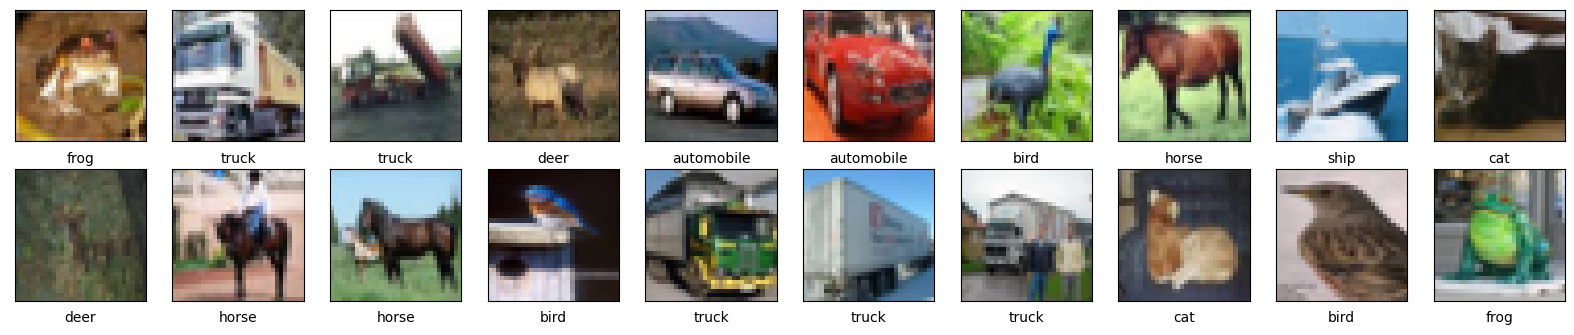

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

构建CNN网络模型

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层3，卷积核3*3
    
    layers.Flatten(),                      #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),   #全连接层，特征进一步提取
    layers.Dense(10)                       #输出层，输出预期结果
])

model.summary()  # 打印网络结构

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
____

编译模型

In [6]:
"""
这里设置优化器、损失函数以及metrics
这三者具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

训练 模型

In [31]:
"""
这里设置输入训练数据集（图片及标签）、验证数据集（图片及标签）以及迭代次数epochs
关于model.fit()函数的具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
   32/50000 [..............................] - ETA: 23s - loss: 0.1564 - acc: 0.9375

50000/50000 [==============================] - 20s 399us/sample - loss: 0.2086 - acc: 0.9243 - val_loss: 1.6201 - val_acc: 0.6946
Epoch 2/10
50000/50000 [==============================] - 20s 397us/sample - loss: 0.2014 - acc: 0.9266 - val_loss: 1.6929 - val_acc: 0.6902
Epoch 3/10
50000/50000 [==============================] - 24s 478us/sample - loss: 0.1904 - acc: 0.9302 - val_loss: 1.7113 - val_acc: 0.6926
Epoch 4/10
50000/50000 [==============================] - 24s 485us/sample - loss: 0.1819 - acc: 0.9352 - val_loss: 1.8419 - val_acc: 0.6938
Epoch 5/10
50000/50000 [==============================] - 25s 493us/sample - loss: 0.1836 - acc: 0.9331 - val_loss: 1.8319 - val_acc: 0.6934
Epoch 6/10
50000/50000 [==============================] - 25s 495us/sample - loss: 0.1826 - acc: 0.9353 - val_loss: 1.9042 - val_acc: 0.6923
Epoch 7/10
50000/50000 [==============================] - 25s 492us/sample - loss: 0.1661 - acc: 0.9408 - val_loss: 2.0343 - val_acc: 0.6806
Epoch 8/10
50000/50000 [

预测

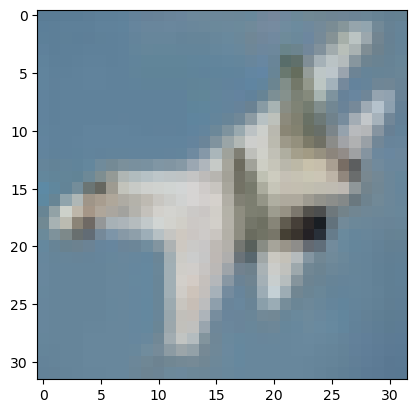

In [32]:
plt.imshow(test_images[10])

In [33]:
import numpy as np

pre = model.predict(test_images)
print(class_names[np.argmax(pre[10])])

airplane


模型评估

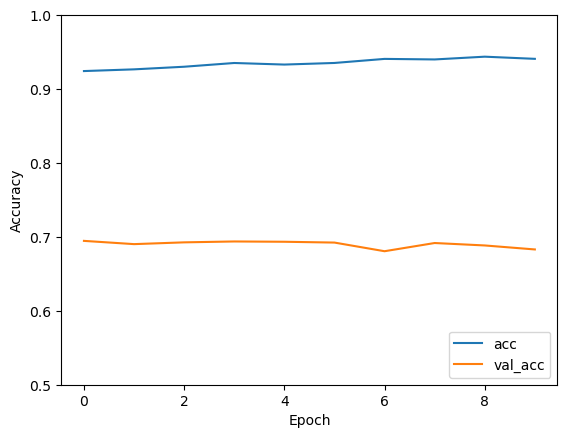

10000/10000 - 1s - loss: 2.1018 - acc: 0.6830


In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)